**Importing helper libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Importing data(Customer Complaints)**

In [2]:
data = pd.read_csv("complaint.csv")

In [3]:
data.columns  # Checking the columns present in the data

Index(['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone'],
      dtype='object')

In [4]:
data.head() # Looking at sample rows to see what kind of data we are handling

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Cable Internet Speeds,22-04-2015,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-2015,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-2015,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Imposed a New Usage Cap of 300GB that punishe...,05-07-2015,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,not working and no service to boot,26-05-2015,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


***Part A - The trend chart about the monthly registered complaints***

In [5]:
dates = data['Date_month_year']                                                             # Geting column containing dates
monthly_complaints = dict()
for i in dates:
    month = i[3:-3]                                                                         # Extracting name of month
    monthly_complaints[month] = monthly_complaints.get(month,0) + 1                         # Counting complaints per month
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']          
complaints = []
for i in months:
    complaints.append(monthly_complaints[i])                                                # Making a list for no. of complaints

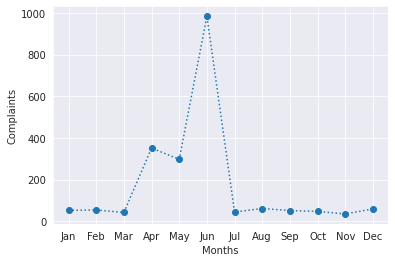

In [6]:
########################
#       Plotting       #
########################
sns.set_style("darkgrid")
plt.plot(range(len(months)), complaints,':')
plt.xticks(range(len(months)), months)
plt.xlabel('Months')
plt.ylabel('Complaints')
plt.scatter(months,complaints)
plt.show()

***Part B - A tabular output with frequencies of complaints***

In [7]:
freq_of_complaints_with_month = pd.DataFrame(data={'Months':months,'Complaints':complaints})    # Frequency of complaints per month
freq_of_complaints_with_month

,Months,Complaints
0,Jan,52
1,Feb,54
2,Mar,42
3,Apr,351
4,May,297
5,Jun,984
6,Jul,44
7,Aug,61
8,Sep,51
9,Oct,47


*** Part C - Frequency of Complaint type : ***

In [8]:
frequency_of_complaints = pd.DataFrame(data['Customer Complaint'].value_counts())   # frequency of complaints based on issue
frequency_of_complaints

,Customer Complaint
Internet,18
Data Cap,17
data cap,12
Data Caps,11
Billing,11
...,...
Unable to fully use services and high bills,1
Poor Service or no Service,1
Bill,1
Data Usage - Additional Fee for Internet Usage but not TV,1


***Part D - The state wise status of complaint in the form of stacked bar***

In [9]:
status = ['Closed','Solved','Open','Pending']
statewise_data = data.groupby(['State','Status'])['State']  # Grouping the data by states and status
statewise_data = statewise_data.count()                     # Counting based on status
statewise_data = statewise_data.unstack()                   # Unstacking the status categories
statewise_data = statewise_data.fillna(0)                   # Filling unavailable/undefined values with 0
statewise_data.head()

Status,Closed,Open,Pending,Solved
State,,,,
Alabama,8.0,4.0,5.0,9.0
Arizona,6.0,2.0,4.0,8.0
Arkansas,1.0,0.0,0.0,4.0
California,69.0,45.0,14.0,82.0
Colorado,21.0,12.0,10.0,32.0


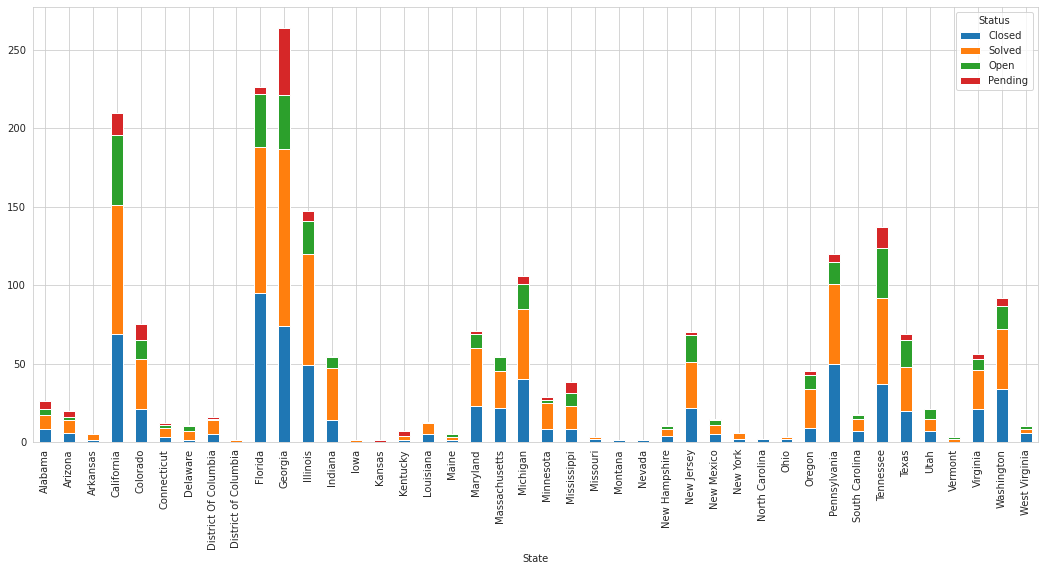

In [23]:
########################
#       Plotting       #
########################
sns.set_style("whitegrid")
statewise_data[status].plot(kind="bar",figsize=[18,8],stacked=True)

***Part E - The state with registered maximum and minimum complaint***

In [11]:
complaints_per_state = pd.DataFrame(data['State'].value_counts())                                                           # Counting complaints per state
state_with_max_complaints = complaints_per_state.loc[complaints_per_state['State'] == complaints_per_state['State'].max()]  # Finding state with max complaints
state_with_max_complaints


,State
Georgia,264


In [12]:
state_with_min_complaints = complaints_per_state.loc[complaints_per_state['State'] == min(complaints_per_state['State'])]    # Finding state with minimum complaints
state_with_min_complaints

,State
Nevada,1
Iowa,1
Kansas,1
Montana,1
District of Columbia,1


***Part F - The states with the highest and lowest percentage of unresolved complaints***

In [13]:
statewise_data['complaints'] = statewise_data.iloc[:,0:].sum(axis=1)              # Finding total no. of complaints per state and adding to "Complaints" column
statewise_data['Percentage_of_Unresolved_Complaints'] = ((statewise_data['Open'] + statewise_data['Pending'])/ statewise_data['complaints'])*100    # Finding percentage of unresolved complaints
statewise_data.head(10)

Status,Closed,Open,Pending,Solved,complaints,Percentage_of_Unresolved_Complaints
State,,,,,,
Alabama,8.0,4.0,5.0,9.0,26.0,34.615385
Arizona,6.0,2.0,4.0,8.0,20.0,30.000000
Arkansas,1.0,0.0,0.0,4.0,5.0,0.000000
California,69.0,45.0,14.0,82.0,210.0,28.095238
Colorado,21.0,12.0,10.0,32.0,75.0,29.333333
Connecticut,3.0,2.0,1.0,6.0,12.0,25.000000
Delaware,1.0,3.0,1.0,6.0,11.0,36.363636
District Of Columbia,5.0,1.0,1.0,9.0,16.0,12.500000
District of Columbia,0.0,0.0,0.0,1.0,1.0,0.000000


In [14]:
statewise_data.loc[statewise_data['Percentage_of_Unresolved_Complaints']==max(statewise_data['Percentage_of_Unresolved_Complaints'])] # Finding state with max percentage of unresolved complaints

Status,Closed,Open,Pending,Solved,complaints,Percentage_of_Unresolved_Complaints
State,,,,,,
Kansas,0.0,0.0,1.0,0.0,1.0,100.0


In [15]:
statewise_data.loc[statewise_data['Percentage_of_Unresolved_Complaints']==min(statewise_data['Percentage_of_Unresolved_Complaints'])] # Finding state with minimum percentage of unresolved complaints

Status,Closed,Open,Pending,Solved,complaints,Percentage_of_Unresolved_Complaints
State,,,,,,
Arkansas,1.0,0.0,0.0,4.0,5.0,0.0
District of Columbia,0.0,0.0,0.0,1.0,1.0,0.0
Iowa,0.0,0.0,0.0,1.0,1.0,0.0
Missouri,2.0,0.0,0.0,1.0,3.0,0.0
Montana,1.0,0.0,0.0,0.0,1.0,0.0
Nevada,1.0,0.0,0.0,0.0,1.0,0.0
New York,2.0,0.0,0.0,4.0,6.0,0.0
North Carolina,2.0,0.0,0.0,0.0,2.0,0.0
Ohio,2.0,0.0,0.0,1.0,3.0,0.0
